<p align='center'>

```
# Isto est√° formatado como c√≥digo
```

# 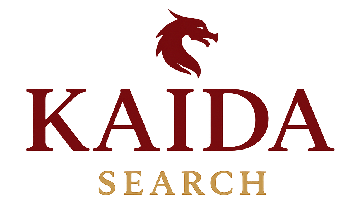


---



# ***Analisando os dados da Pesquisa***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Insira os dados salvos na pesquisa ap√≥s descompactado. As respostas devem estar no formato "CSV" e salvos com o nome "Praticas ESG em T.I" que √© o padr√£o da ferramenta.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Praticas ESG em T.I.csv to Praticas ESG em T.I.csv


In [3]:
df = pd.read_csv('/content/Praticas ESG em T.I.csv', sep=',', encoding='utf-8')

In [4]:
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('  ', ' ', regex=False)
df.columns

Index(['Carimbo de data/hora', 'Pontua√ß√£o total',
       '1. Qual a sua faixa et√°ria?',
       '1. Qual a sua faixa et√°ria? [Pontua√ß√£o]',
       '1. Qual a sua faixa et√°ria? [Feedback]',
       '2. Qual √© o seu n√≠vel de forma√ß√£o?',
       '2. Qual √© o seu n√≠vel de forma√ß√£o?  [Pontua√ß√£o]',
       '2. Qual √© o seu n√≠vel de forma√ß√£o?  [Feedback]',
       '3. Voc√™ j√° ouviu falar sobre pr√°ticas ESG (Ambiental, Social e Governan√ßa)?',
       '3. Voc√™ j√° ouviu falar sobre pr√°ticas ESG (Ambiental, Social e Governan√ßa)? [Pontua√ß√£o]',
       '3. Voc√™ j√° ouviu falar sobre pr√°ticas ESG (Ambiental, Social e Governan√ßa)? [Feedback]',
       '4.Voc√™ saberia explicar o que s√£o pr√°ticas ESG?',
       '4.Voc√™ saberia explicar o que s√£o pr√°ticas ESG? [Pontua√ß√£o]',
       '4.Voc√™ saberia explicar o que s√£o pr√°ticas ESG? [Feedback]',
       '5. Voc√™ acha importante que profissionais de TI conhe√ßam e apliquem princ√≠pios ESG no seu trabalho?',
       '5. Voc√™

In [5]:
df.head()

Carimbo de data/hora Pontua√ß√£o total 1. Qual a sua faixa et√°ria?  \
0  2025/07/10 1:25:24 PM GMT-3      0.00 / 100               Entre 40 e 50   
1  2025/07/10 1:33:04 PM GMT-3      0.00 / 100               Entre 40 e 50   
2  2025/07/10 1:39:30 PM GMT-3      0.00 / 100               Entre 20 e 30   
3  2025/07/10 1:40:30 PM GMT-3      0.00 / 100               Entre 40 e 50   
4  2025/07/10 2:05:55 PM GMT-3      0.00 / 100               Entre 30 e 40   

  1. Qual a sua faixa et√°ria? [Pontua√ß√£o]  \
0                                  -- / 0   
1                                  -- / 0   
2                                  -- / 0   
3                                  -- / 0   
4                                  -- / 0   

   1. Qual a sua faixa et√°ria? [Feedback] 2. Qual √© o seu n√≠vel de forma√ß√£o?  \
0                                     NaN                             Outros   
1                                     NaN                             Outros   
2                                     NaN                     T√©cnico em T.I   
3                                     NaN                  Superior Completo   
4                                     NaN                     T√©cnico em T.I   

  2. Qual √© o seu n√≠vel de forma√ß√£o?  [Pontua√ß√£o]  \
0                                          -- / 0   
1                                          -- / 0   
2                                          -- / 0   
3                                          -- / 0   
4                                          -- / 0   

   2. Qual √© o seu n√≠vel de forma√ß√£o?  [Feedback]  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  3. Voc√™ j√° ouviu falar sobre pr√°ticas ESG (Ambiental, Social e Governan√ßa)?  \
0                                                Sim                            
1                                                Sim                            
2                                                Sim                            
3                                                Sim                            
4                                                Sim                            

  3. Voc√™ j√° ouviu falar sobre pr√°ticas ESG (Ambiental, Social e Governan√ßa)? [Pontua√ß√£o]  \
0                                             -- / 0                                        
1                                             -- / 0                                        
2                                             -- / 0                                        
3                                             -- / 0                                        
4                                             -- / 0                                        

   ...  \
0  ...   
1  ...   
2  ...   
3  ...   
4  ...   

   5. Voc√™ acha importante que profissionais de TI conhe√ßam e apliquem princ√≠pios ESG no seu trabalho? [Feedback]  \
0                                                NaN                                                                
1                                                NaN                                                                
2                                                NaN                                                                
3                                                NaN                                                                
4                                                NaN                                                                

  6. Na empresa onde voc√™ trabalha (ou trabalhou mais recentemente), existe alguma pol√≠tica ou a√ß√£o voltada √†s pr√°ticas ESG?  \
0                                         N√£o existe                                                                           
1                                   N√£o s

In [6]:
df = df[[col for col in df.columns if '[Pontua√ß√£o]' not in col and '[Feedback]' not in col]]


In [7]:
# Remove espa√ßos e quebras de linha dos nomes das colunas
df.columns = df.columns.str.strip()

# Agora renomeia corretamente
df = df.rename(columns={
    '1. Qual a sua faixa et√°ria?': 'Faixa Et√°ria',
    '2. Qual √© o seu n√≠vel de forma√ß√£o?': 'Forma√ß√£o',
    '3. Voc√™ j√° ouviu falar sobre pr√°ticas ESG (Ambiental, Social e Governan√ßa)?': 'Conhece ESG?',
    '4. Voc√™ saberia explicar o que s√£o pr√°ticas ESG?': 'Sabe explicar?',
    '5. Voc√™ acha importante que profissionais de TI conhe√ßam e apliquem princ√≠pios ESG no seu trabalho?': 'Import√¢ncia',
    '6. Na empresa onde voc√™ trabalha (ou trabalhou mais recentemente), existe alguma pol√≠tica ou a√ß√£o voltada √†s pr√°ticas ESG?': 'Conhecimento da pol√≠tica ESG?',
    '7. Na sua opini√£o, qual √°rea da TI pode mais contribuir com as pr√°ticas ESG?': '√Årea da TI Atuante',
    '8. Voc√™ gostaria de aprender mais sobre ESG aplicado √† √°rea de TI?': 'Gostaria de aprender sobre ESG ?'
})



In [8]:
print(df.columns.tolist())


['Carimbo de data/hora', 'Pontua√ß√£o total', 'Faixa Et√°ria', 'Forma√ß√£o', 'Conhece ESG?', '4.Voc√™ saberia explicar o que s√£o pr√°ticas ESG?', 'Import√¢ncia', 'Conhecimento da pol√≠tica ESG?', '√Årea da TI Atuante', 'Gostaria de aprender sobre ESG ?']


In [9]:
df = df.drop(columns=['Carimbo de data/hora', 'Pontua√ß√£o total'], errors='ignore')


In [10]:
print(df.head())

    Faixa Et√°ria           Forma√ß√£o Conhece ESG?  \
0  Entre 40 e 50             Outros          Sim   
1  Entre 40 e 50             Outros          Sim   
2  Entre 20 e 30     T√©cnico em T.I          Sim   
3  Entre 40 e 50  Superior Completo          Sim   
4  Entre 30 e 40     T√©cnico em T.I          Sim   

  4.Voc√™ saberia explicar o que s√£o pr√°ticas ESG?              Import√¢ncia  \
0       Tenho uma no√ß√£o, mas n√£o saberia explicar                      Sim   
1       Tenho uma no√ß√£o, mas n√£o saberia explicar                      Sim   
2       Tenho uma no√ß√£o, mas n√£o saberia explicar                      N√£o   
3                         Sim com total seguran√ßa                      Sim   
4                                     N√£o saberia  Nunca pensei sobre isso   

  Conhecimento da pol√≠tica ESG?          √Årea da TI Atuante  \
0                    N√£o existe                 Manuten√ß√£o    
1              N√£o sei informar                  Seguran√ßa    
2

In [11]:
df.head()

Faixa Et√°ria           Forma√ß√£o Conhece ESG?  \
0  Entre 40 e 50             Outros          Sim   
1  Entre 40 e 50             Outros          Sim   
2  Entre 20 e 30     T√©cnico em T.I          Sim   
3  Entre 40 e 50  Superior Completo          Sim   
4  Entre 30 e 40     T√©cnico em T.I          Sim   

  4.Voc√™ saberia explicar o que s√£o pr√°ticas ESG?              Import√¢ncia  \
0       Tenho uma no√ß√£o, mas n√£o saberia explicar                      Sim   
1       Tenho uma no√ß√£o, mas n√£o saberia explicar                      Sim   
2       Tenho uma no√ß√£o, mas n√£o saberia explicar                      N√£o   
3                         Sim com total seguran√ßa                      Sim   
4                                     N√£o saberia  Nunca pensei sobre isso   

  Conhecimento da pol√≠tica ESG?          √Årea da TI Atuante  \
0                    N√£o existe                 Manuten√ß√£o    
1              N√£o sei informar                  Seguran√ßa    
2       Sim, formal e divulgada  Gest√£o de Dados e Sistemas   
3              N√£o sei informar                         NaN   
4              N√£o sei informar                       Todas   

  Gostaria de aprender sobre ESG ?  
0                           Talvez  
1                              Sim  
2                              N√£o  
3                              N√£o  
4                           Talvez

In [12]:
df.shape

(23, 8)

# N√≠vel de Forma√ß√£o dos Entrevistados

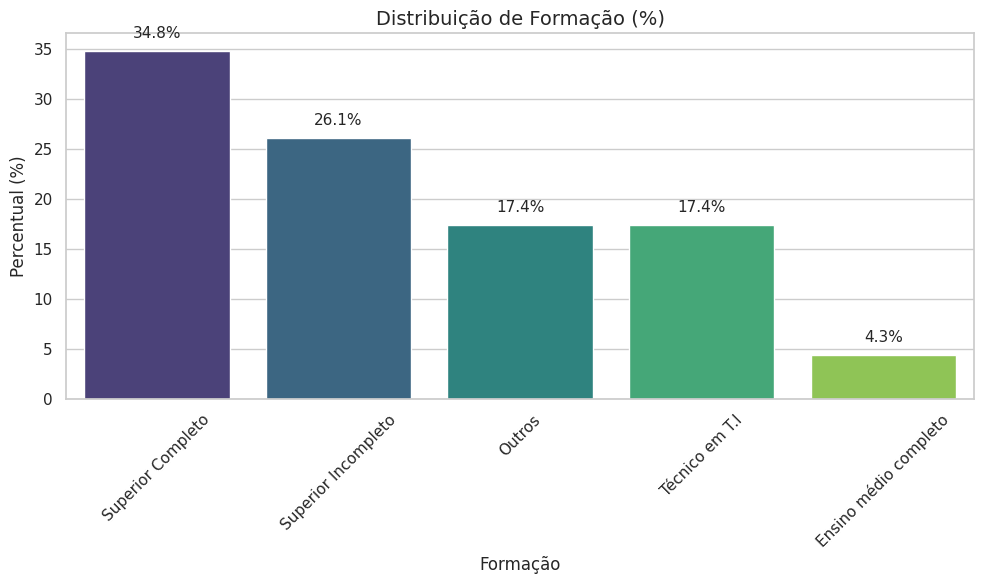

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Opcional: oculta warnings futuros do seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# Configura estilo dos gr√°ficos
sns.set(style="whitegrid")

# Contagem e c√°lculo de percentual
form_counts = df['Forma√ß√£o'].value_counts()
form_percent = (form_counts / form_counts.sum()) * 100

# Cria o gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=form_percent.index,
    y=form_percent.values,
    hue=form_percent.index,  # aplica hue igual ao eixo x
    palette='viridis',
    legend=False              # desativa legenda duplicada
)

# Adiciona os r√≥tulos de percentual no topo das colunas
for i, value in enumerate(form_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes finais
plt.title('Distribui√ß√£o de Forma√ß√£o (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('Forma√ß√£o')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Faixa Et√°ria dos Entrevistados

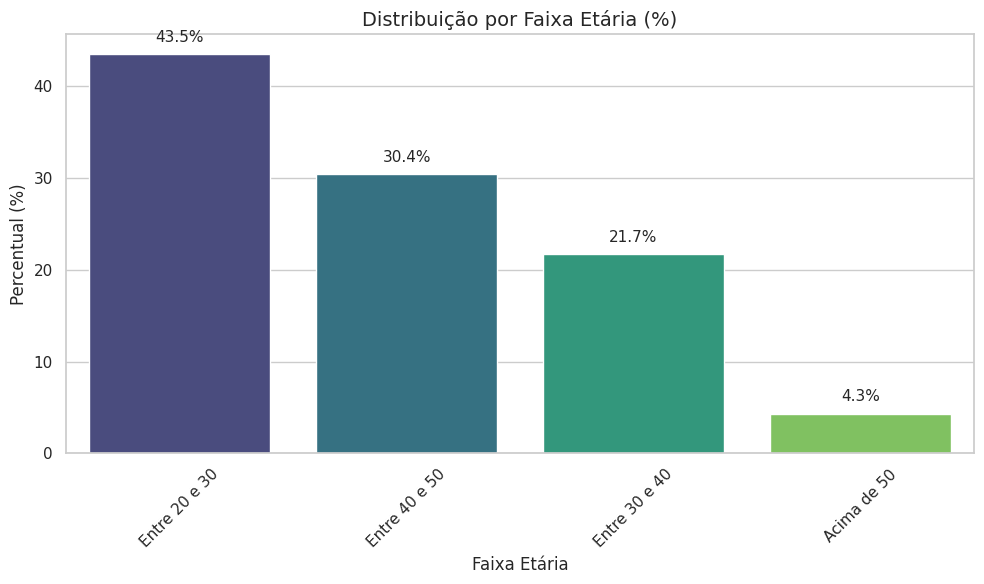

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros do seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# Configura estilo dos gr√°ficos
sns.set(style="whitegrid")

# Contagem e c√°lculo de percentual da coluna Faixa Et√°ria
age_counts = df['Faixa Et√°ria'].value_counts()
age_percent = (age_counts / age_counts.sum()) * 100

# Cria o gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=age_percent.index,
    y=age_percent.values,
    hue=age_percent.index,
    palette='viridis',
    legend=False
)

# Adiciona os r√≥tulos de percentual no topo das colunas
for i, value in enumerate(age_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes finais
plt.title('Distribui√ß√£o por Faixa Et√°ria (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('Faixa Et√°ria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Conhecimento sobre ESG

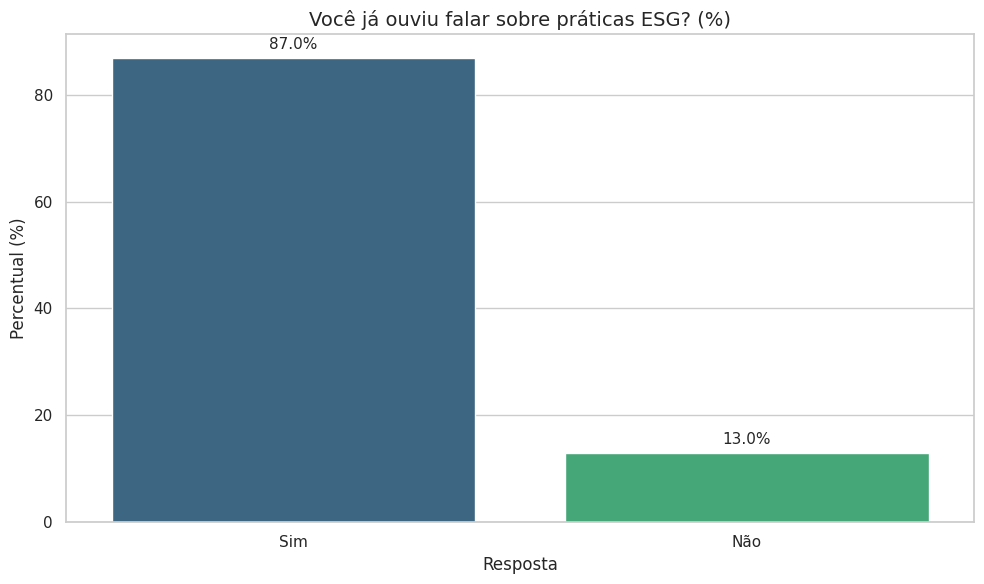

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros do seaborn
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual da coluna 'Conhece ESG?'
esg_conhece_counts = df['Conhece ESG?'].value_counts()
esg_conhece_percent = (esg_conhece_counts / esg_conhece_counts.sum()) * 100

# Cria√ß√£o do gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=esg_conhece_percent.index,
    y=esg_conhece_percent.values,
    hue=esg_conhece_percent.index,
    palette='viridis',
    legend=False
)

# R√≥tulos de percentual no topo
for i, value in enumerate(esg_conhece_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes de visual
plt.title('Voc√™ j√° ouviu falar sobre pr√°ticas ESG? (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('Resposta')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Grau de Conhecimento sobre ESG

In [16]:
df.columns = df.columns.str.strip()  # garantir que n√£o h√° espa√ßos/quebras de linha
df = df.rename(columns={
    '4.Voc√™ saberia explicar o que s√£o pr√°ticas ESG?': 'Sabe explicar?'
})


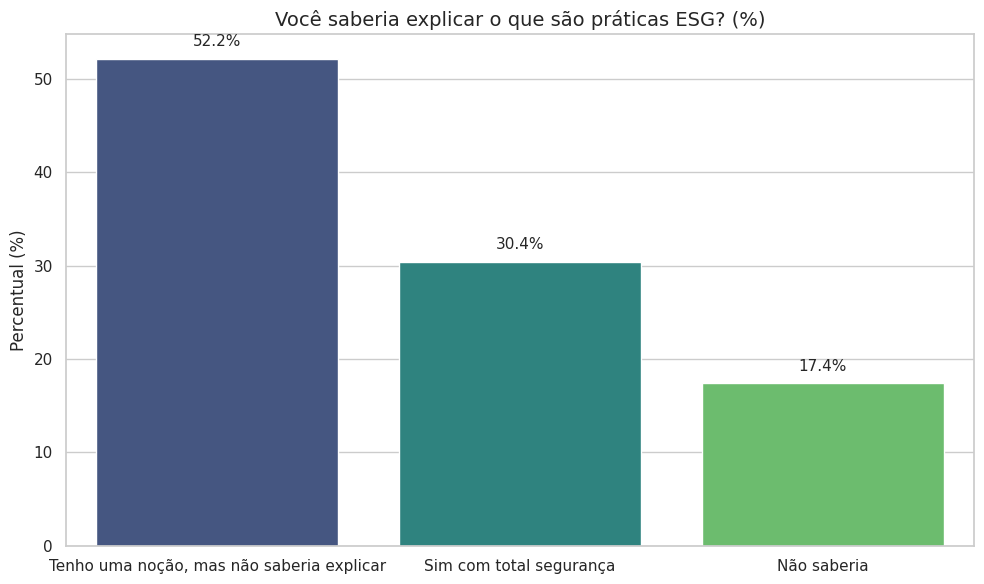

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual da coluna
explica_counts = df['Sabe explicar?'].value_counts()
explica_percent = (explica_counts / explica_counts.sum()) * 100

# Cria√ß√£o do gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=explica_percent.index,
    y=explica_percent.values,
    hue=explica_percent.index,
    palette='viridis',
    legend=False
)

# R√≥tulos no topo
for i, value in enumerate(explica_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes finais
plt.title('Voc√™ saberia explicar o que s√£o pr√°ticas ESG? (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Percep√ß√£o de Import√¢ncia

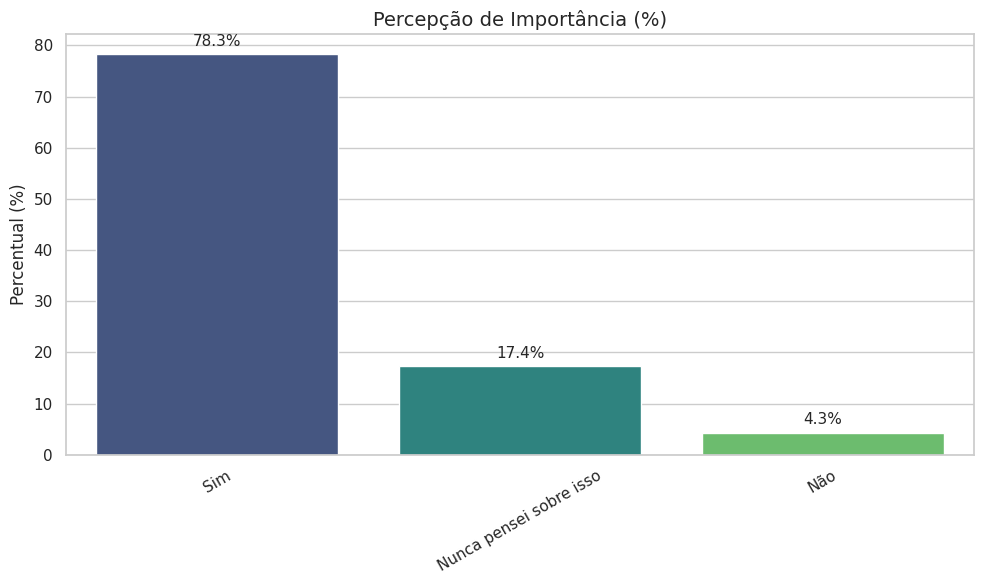

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual da coluna 'Import√¢ncia'
importancia_counts = df['Import√¢ncia'].value_counts()
importancia_percent = (importancia_counts / importancia_counts.sum()) * 100

# Cria√ß√£o do gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=importancia_percent.index,
    y=importancia_percent.values,
    hue=importancia_percent.index,
    palette='viridis',
    legend=False
)

# R√≥tulos no topo das barras
for i, value in enumerate(importancia_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes finais
plt.title('Percep√ß√£o de Import√¢ncia (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Conhecimento da pol√≠tica ESG da empresa?

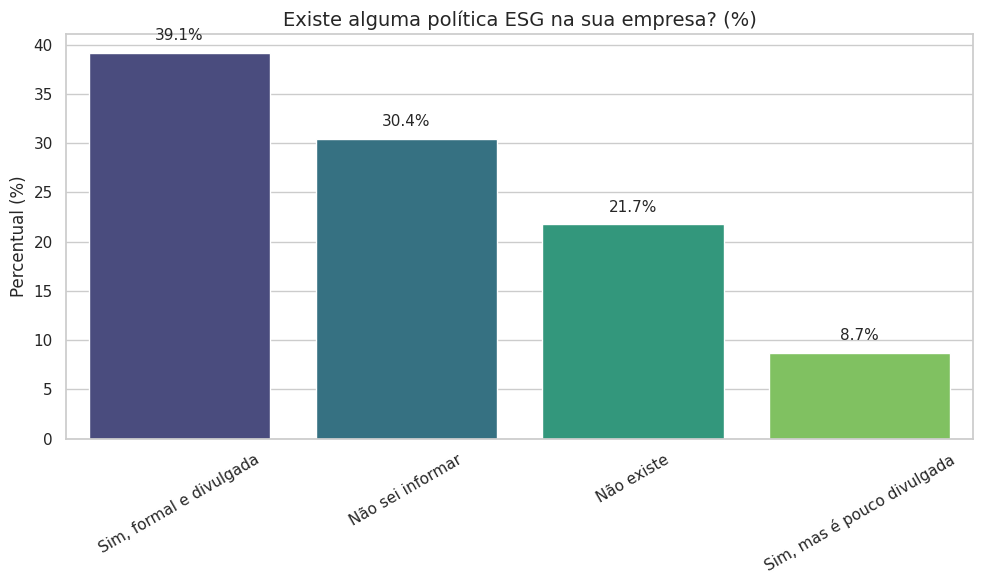

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual da coluna
politica_counts = df['Conhecimento da pol√≠tica ESG?'].value_counts()
politica_percent = (politica_counts / politica_counts.sum()) * 100

# Cria√ß√£o do gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=politica_percent.index,
    y=politica_percent.values,
    hue=politica_percent.index,
    palette='viridis',
    legend=False
)

# R√≥tulos de percentual no topo das colunas
for i, value in enumerate(politica_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes visuais
plt.title('Existe alguma pol√≠tica ESG na sua empresa? (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Percep√ß√£o de √°rea respons√°vel

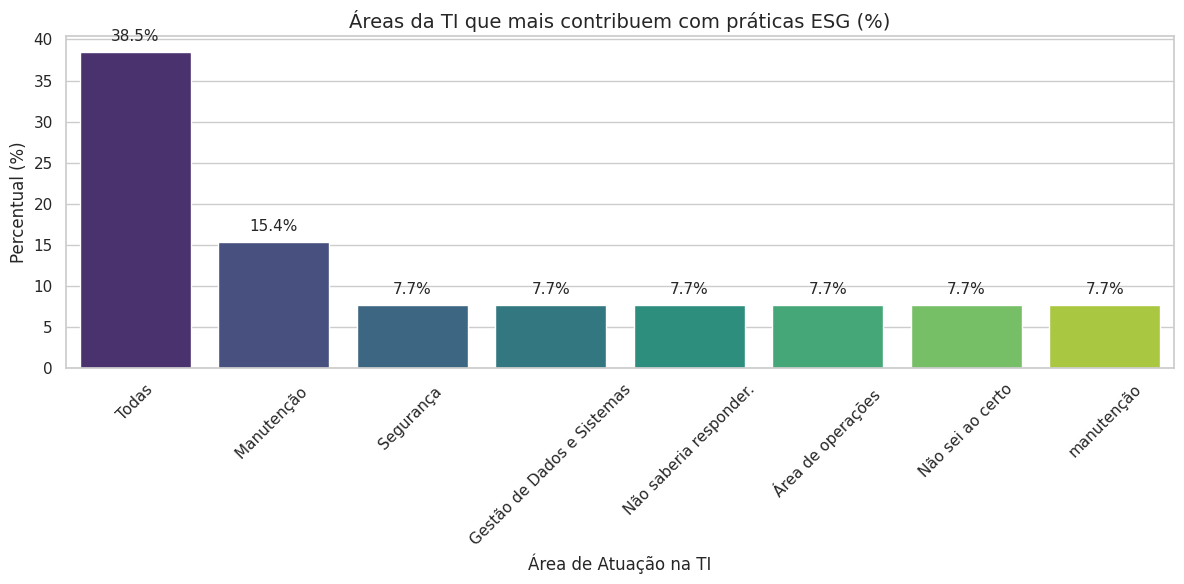

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual
area_counts = df['√Årea da TI Atuante'].value_counts()
area_percent = (area_counts / area_counts.sum()) * 100

# Cria√ß√£o do gr√°fico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=area_percent.index,
    y=area_percent.values,
    hue=area_percent.index,
    palette='viridis',
    legend=False
)

# R√≥tulos de percentual
for i, value in enumerate(area_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes visuais
plt.title('√Åreas da TI que mais contribuem com pr√°ticas ESG (%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('√Årea de Atua√ß√£o na TI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Gostaria de aprender sobre ESG ?

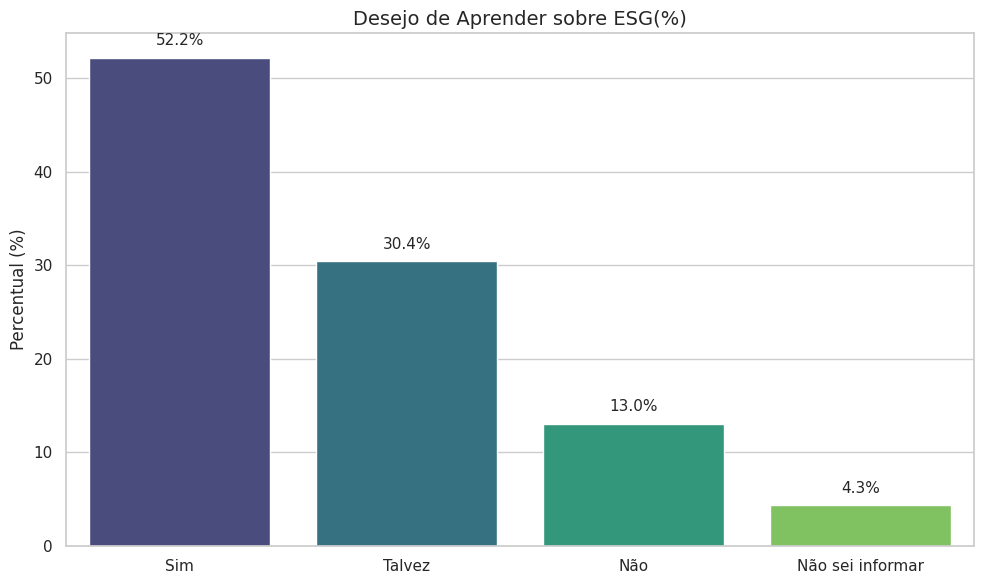

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Oculta avisos futuros
warnings.filterwarnings("ignore", category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Contagem e percentual
aprender_counts = df['Gostaria de aprender sobre ESG ?'].value_counts()
aprender_percent = (aprender_counts / aprender_counts.sum()) * 100

# Cria√ß√£o do gr√°fico
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=aprender_percent.index,
    y=aprender_percent.values,
    hue=aprender_percent.index,
    palette='viridis',
    legend=False
)

# R√≥tulos de percentual no topo das colunas
for i, value in enumerate(aprender_percent.values):
    plt.text(i, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=11)

# Ajustes finais
plt.title('Desejo de Aprender sobre ESG(%)', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [22]:
df.head()


Faixa Et√°ria           Forma√ß√£o Conhece ESG?  \
0  Entre 40 e 50             Outros          Sim   
1  Entre 40 e 50             Outros          Sim   
2  Entre 20 e 30     T√©cnico em T.I          Sim   
3  Entre 40 e 50  Superior Completo          Sim   
4  Entre 30 e 40     T√©cnico em T.I          Sim   

                              Sabe explicar?              Import√¢ncia  \
0  Tenho uma no√ß√£o, mas n√£o saberia explicar                      Sim   
1  Tenho uma no√ß√£o, mas n√£o saberia explicar                      Sim   
2  Tenho uma no√ß√£o, mas n√£o saberia explicar                      N√£o   
3                    Sim com total seguran√ßa                      Sim   
4                                N√£o saberia  Nunca pensei sobre isso   

  Conhecimento da pol√≠tica ESG?          √Årea da TI Atuante  \
0                    N√£o existe                 Manuten√ß√£o    
1              N√£o sei informar                  Seguran√ßa    
2       Sim, formal e divulgada  Gest√£o de Dados e Sistemas   
3              N√£o sei informar                         NaN   
4              N√£o sei informar                       Todas   

  Gostaria de aprender sobre ESG ?  
0                           Talvez  
1                              Sim  
2                              N√£o  
3                              N√£o  
4                           Talvez

# Correla√ß√£o entre as vari√°veis

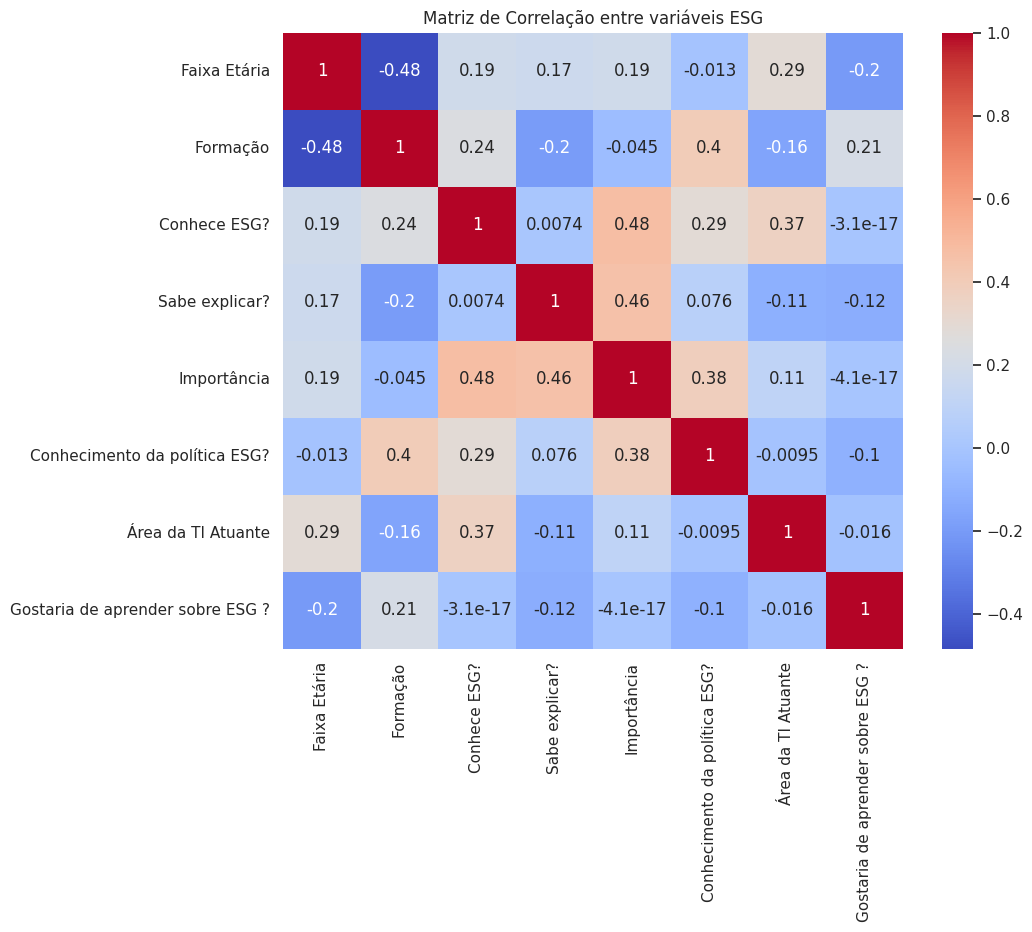

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Converter colunas categ√≥ricas em num√©ricas para correla√ß√£o
df_encoded = df.copy()
for col in df.columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Matriz de correla√ß√£o
corr = df_encoded.corr()

# Visualiza√ß√£o
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correla√ß√£o entre vari√°veis ESG')
plt.show()


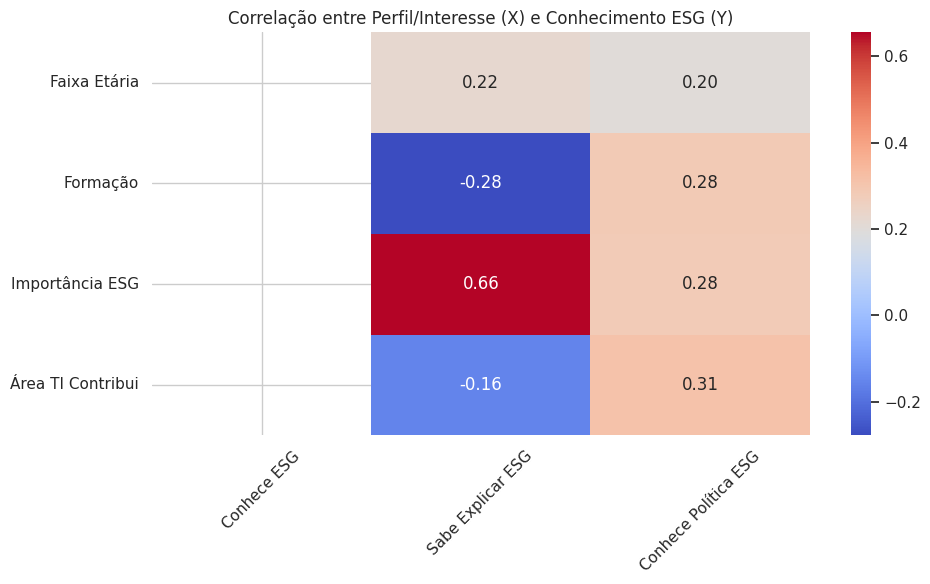

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregamento
df = pd.read_csv('/content/Praticas ESG em T.I.csv', sep=',', encoding='utf-8')
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('  ', ' ', regex=False)

# Sele√ß√£o das colunas de interesse
df_selected = df[[
    '1. Qual a sua faixa et√°ria?',
    '2. Qual √© o seu n√≠vel de forma√ß√£o?',
    '5. Voc√™ acha importante que profissionais de TI conhe√ßam e apliquem princ√≠pios ESG no seu trabalho?',
    '7. Na sua opini√£o, qual √°rea da TI pode mais contribuir com as pr√°ticas ESG?',
    '3. Voc√™ j√° ouviu falar sobre pr√°ticas ESG (Ambiental, Social e Governan√ßa)?',
    '4.Voc√™ saberia explicar o que s√£o pr√°ticas ESG?',
    '6. Na empresa onde voc√™ trabalha (ou trabalhou mais recentemente), existe alguma pol√≠tica ou a√ß√£o voltada √†s pr√°ticas ESG?'
]]

# Renomeando para simplificar a an√°lise
df_selected.columns = [
    'Faixa Et√°ria',
    'Forma√ß√£o',
    'Import√¢ncia ESG',
    '√Årea TI Contribui',
    'Conhece ESG',
    'Sabe Explicar ESG',
    'Conhece Pol√≠tica ESG'
]

# Tratamento de valores ausentes
df_selected = df_selected.dropna()

# Codificando vari√°veis categ√≥ricas
df_encoded = df_selected.apply(lambda col: col.astype('category').cat.codes)

# Definindo X e Y
X_cols = ['Faixa Et√°ria', 'Forma√ß√£o', 'Import√¢ncia ESG', '√Årea TI Contribui']
Y_cols = ['Conhece ESG', 'Sabe Explicar ESG', 'Conhece Pol√≠tica ESG']

# Correla√ß√£o entre X e Y
corr_matrix = df_encoded[X_cols + Y_cols].corr()
corr_xy = corr_matrix.loc[X_cols, Y_cols]

# Visualiza√ß√£o
plt.figure(figsize=(10, 6))
sns.heatmap(corr_xy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correla√ß√£o entre Perfil/Interesse (X) e Conhecimento ESG (Y)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Resultados e Conclus√£o

In [25]:
# Gerador autom√°tico de insights sobre a matriz de correla√ß√£o

def gerar_insights(corr_df, lim_forte=0.5, lim_moderado=0.3, lim_fraco=0.1):
    insights = []
    for x_var in corr_df.index:
        for y_var in corr_df.columns:
            corr = corr_df.loc[x_var, y_var]
            interpretacao = ""

            if corr >= lim_forte:
                interpretacao = f"forte correla√ß√£o positiva ({corr:.2f})"
            elif corr >= lim_moderado:
                interpretacao = f"correla√ß√£o moderada ({corr:.2f})"
            elif corr >= lim_fraco:
                interpretacao = f"correla√ß√£o fraca ({corr:.2f})"
            elif corr <= -lim_forte:
                interpretacao = f"forte correla√ß√£o negativa ({corr:.2f})"
            elif corr <= -lim_moderado:
                interpretacao = f"correla√ß√£o negativa moderada ({corr:.2f})"
            elif corr <= -lim_fraco:
                interpretacao = f"correla√ß√£o negativa fraca ({corr:.2f})"
            else:
                continue  # correla√ß√µes muito fracas (pr√≥ximas de zero) s√£o ignoradas

            frase = f"- A vari√°vel **'{x_var}'** tem {interpretacao} com **'{y_var}'**."
            insights.append(frase)

    return "\n".join(insights)

# Aplicando a fun√ß√£o √† sua matriz
texto_insights = gerar_insights(corr_xy)
print("üìå INSIGHTS AUTOM√ÅTICOS BASEADOS NA CORRELA√á√ÉO:\n")
print(texto_insights)


üìå INSIGHTS AUTOM√ÅTICOS BASEADOS NA CORRELA√á√ÉO:

- A vari√°vel **'Faixa Et√°ria'** tem correla√ß√£o fraca (0.22) com **'Sabe Explicar ESG'**.
- A vari√°vel **'Faixa Et√°ria'** tem correla√ß√£o fraca (0.20) com **'Conhece Pol√≠tica ESG'**.
- A vari√°vel **'Forma√ß√£o'** tem correla√ß√£o negativa fraca (-0.28) com **'Sabe Explicar ESG'**.
- A vari√°vel **'Forma√ß√£o'** tem correla√ß√£o fraca (0.28) com **'Conhece Pol√≠tica ESG'**.
- A vari√°vel **'Import√¢ncia ESG'** tem forte correla√ß√£o positiva (0.66) com **'Sabe Explicar ESG'**.
- A vari√°vel **'Import√¢ncia ESG'** tem correla√ß√£o fraca (0.28) com **'Conhece Pol√≠tica ESG'**.
- A vari√°vel **'√Årea TI Contribui'** tem correla√ß√£o negativa fraca (-0.16) com **'Sabe Explicar ESG'**.
- A vari√°vel **'√Årea TI Contribui'** tem correla√ß√£o moderada (0.31) com **'Conhece Pol√≠tica ESG'**.
